
## Monolithic scheme with backward Euler scheme

Using the backward Euler time integration scheme, we can write the equations for the monolithic scheme as

\begin{align}
%m^s \, \ddot{d}_{n+1} + k \, d_{n+1} &= f^s_{n+1}, \\
%m^f \, \dot{v}^f_{n+1}  + c \, v^f_{n+1} &= f^f_{n+1}, \\
\alpha \, \ddot{d} + \omega^2 \, d &= f^s, \\
%
(1-\alpha) \, \dot{v}^f + 2 \, \xi \, \omega \, v^f &= f^f, \\
%
\dot{d}_{n+1} &= v^f_{n+1}, \\
%
f^s_{n+1} + f^f_{n+1} &= 0
\end{align}
where
\begin{align}
\dot{d}_{n+1}  &= \frac{d_{n+1}-d_{n}}{\Delta t}, \\
\ddot{d}_{n+1} &= \frac{\dot{d}_{n+1}-\dot{d}_{n}}{\Delta t}
= \frac{1}{\Delta t^2} \left[ d_{n+1}-d_{n} \right] - \frac{1}{\Delta t} \, \dot{d}_{n}, \\
\dot{v}^f_{n+1}  &= \frac{v^f_{n+1}-v^f_{n}}{\Delta t}, \\
\end{align}

With $\dot{d}_n = v^f_n$, $\dot{d}_{n+1} = v^f_{n+1}$ and $f^s_{n+1} = - f^f_{n+1} = f_{n+1}$, the system of equations can be written in the matrix-vector form as,

\begin{align}
\begin{Bmatrix}
d_{n+1} \\
\dot{d}_{n+1} \Delta t \\
f_{n+1} \Delta t^2
\end{Bmatrix}
=
\begin{bmatrix}
 \\
\mathbf{A}_{\text{mono-BE}} \\
\\
\end{bmatrix}
\begin{Bmatrix}
d_{n} \\ \dot{d}_{n} \Delta t \\ f_{n} \Delta t^2
\end{Bmatrix}
\end{align}

The matrix is given as
\begin{align}
\mathbf{A}_{\text{mono-BE}} =
\frac{1}{1 + 2 \, \xi \, \omega \, \Delta t + \omega^2 \, \Delta t^2}
\begin{bmatrix}
1 + 2 \, \xi \, \omega \, \Delta t    &   1   &    0   \\
%
-\omega^2 \, \Delta t^2   &   1   &    0   \\
%
\omega^2 \, \Delta t^2 (1 - \alpha + 2 \, \xi \, \omega \, \Delta t) &   \omega \, \Delta t \, (\omega \Delta t (1-\alpha) - 2 \, \xi \, \alpha)   &    0   \\
%
\end{bmatrix}
\end{align}

As we can observe, the matrix is still well behaved for $\alpha = m^r = 0$. Note that $\alpha=\frac{m^r}{1+m^r}$.

Some important properties of this scheme are:
* The scheme is first-order accurate in time.
* It's stability does not depend on the value of $\alpha$ (or $m^r$).

We can plot the spectral radius for different values of $m^r$ to verify the stability.

### Spectral radius
Spectral radius is the maximum value of the eigenvalues of the amplification matrix ($\mathbf{A}$). For a scheme to be stable, the spectral radius ($\rho$) should be less than or equal to one, i.e. $\rho \leq 1$.


Spectral radius for the monolithic scheme can calculated using the function call

**specRad = spectralRadius_monolithic_BE(m, c, k, mr, logtimestep)**

Function's inputs: mass ($m$), damping coefficient ($c$), stiffness ($k$), mass ratio ($m^r$), array of log10 of time steps (logtimestep)

Function's output: array of spectral radius values 


### Mass ratio $m^r=10$

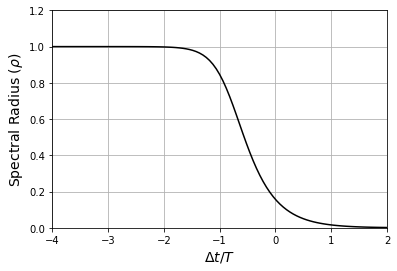

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pythonscripts.utilities_monolithic import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

mr = 10.0;                       # mass ratio

tt = np.linspace(-4, 2, 101)


specRad = spectralRadius_monolithic_BE(m, c, k, mr, tt)

plt.plot(tt, specRad,'k')
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(tt), max(tt)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.show()

### Mass ratio $m^r=0.001$

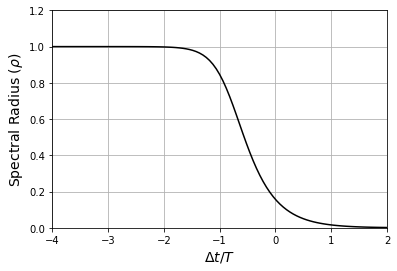

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from pythonscripts.utilities_monolithic import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

mr = 0.001;                       # mass ratio

tt = np.linspace(-4, 2, 101)


specRad = spectralRadius_monolithic_BE(m, c, k, mr, tt)

plt.plot(tt, specRad,'k')
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(tt), max(tt)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.show()

## Mass ratios $m^r=10, 0.001, 0.0$

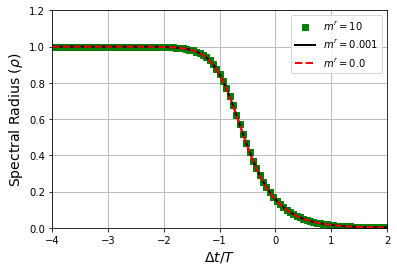

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from pythonscripts.utilities_monolithic import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

tt = np.linspace(-4, 2, 101)

mr = 10.0;                        # mass ratio
specRad1 = spectralRadius_monolithic_BE(m, c, k, mr, tt)

mr = 0.001;                       # mass ratio
specRad2 = spectralRadius_monolithic_BE(m, c, k, mr, tt)

mr = 0.0;                         # mass ratio
specRad3 = spectralRadius_monolithic_BE(m, c, k, mr, tt)


plt.plot(tt, specRad1,'gs',  linewidth=3, label=r"$m^r=10$")
plt.plot(tt, specRad2,'k-', linewidth=2, label=r"$m^r=0.001$")
plt.plot(tt, specRad3,'r--',  linewidth=2, label=r"$m^r=0.0$")
plt.xlabel(r"$\Delta t/T$", fontsize=14)
plt.ylabel(r"Spectral Radius ($\rho$)", fontsize=14)
plt.xlim([min(tt), max(tt)])
plt.ylim([0.0, 1.2])
plt.grid()
plt.legend()
plt.show()

Therefore, the scheme is stable irrespective of the value of $m^r$.

### Solution with $m^r=10$

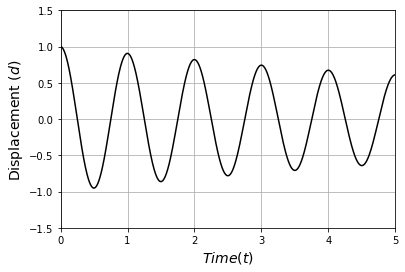

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pythonscripts.utilities_monolithic import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 5*T+dt, dt)

mr = 10.0;                       # mass ratio


# solution with the monolithic scheme
dispMono, veloMono = solution_monolithic_BE(m, c, k, mr, timesteparray)

plt.plot(timesteparray, dispMono,'k')
plt.xlabel(r"$Time (t)$", fontsize=14)
plt.ylabel(r"Displacement ($d$)", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.grid()
plt.show()

### Solution with different $m^r$

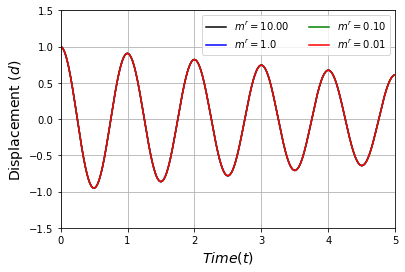

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from pythonscripts.utilities_monolithic import *


## Input parameters
#
m  = 1.0;                        # total mass, m=ms+mf
k  = 4.0*np.pi**2;               # stiffness
c  = 0.0;                        # damping coefficient

w  = np.sqrt(k/m);               # (circular) natural frequency
xi = c/(2.0*np.sqrt(k*m));       # damping ratio
wd = w*np.sqrt(1.0-xi*xi);       # damped natural frequency
T  = 2.0*np.pi/w;                # time period

dt = T/200.0;

timesteparray = np.arange(0.0, 5*T+dt, dt)

mr = 10.0;                       # mass ratio


# solution with the monolithic scheme
dispMono1, veloMono1 = solution_monolithic_BE(m, c, k, 10.0, timesteparray)
dispMono2, veloMono2 = solution_monolithic_BE(m, c, k,  1.0, timesteparray)
dispMono3, veloMono3 = solution_monolithic_BE(m, c, k,  0.1, timesteparray)
dispMono4, veloMono4 = solution_monolithic_BE(m, c, k,  0.01, timesteparray)

plt.plot(timesteparray, dispMono1,'k', label=r"$m^r=10.00$")
plt.plot(timesteparray, dispMono2,'b', label=r"$m^r= 1.0$")
plt.plot(timesteparray, dispMono3,'g', label=r"$m^r= 0.10$")
plt.plot(timesteparray, dispMono4,'r', label=r"$m^r= 0.01$")
plt.xlabel(r"$Time (t)$", fontsize=14)
plt.ylabel(r"Displacement ($d$)", fontsize=14)
plt.xlim([min(timesteparray), max(timesteparray)])
plt.ylim([-1.5, 1.5])
plt.legend(ncol=2)
plt.grid()
plt.show()

Thus, for the monolithic scheme the solution does not depend on the value of $m^r$.